#### Problem; Identifying the employee churn
For this activity you will be evaluating a dataset composed of human resources data. 

A Company X has a goal to reach less than 1 % attrition rate by the end of the year by identifying employees who need one to one intervention before they drop papers of resignation. As a data scientist, your task is to model the factors that “ predict how likely an employee is to churn the company” , using supervised learning techniques. You will need to analyse the dataset on employee churn. 
Your task is to build a logistic regression model (or K-NN model) that predict whether or not an employee is likely to leave his/her job based on characteristics in the dataset.
- id - Anonymous ID number for each employee
- satisfaction - Employee satisfaction level
- evaluation - Last evaluation score
- number_of_project - Number of projects assigned to
- average_monthly_hours - Average monthly hours worked
- time_spend_company - Time spent at the company
- work_accident - (1= Yes, 0 = No) - Whether they have had a work accident
- churn - Whether or not employee left company (1 = Yes, 0 = No)
- promotion - (1 = Yes, 0 = No) - Whether they have had a promotion in the last 5 years
- department - Department name (not just sales)
- salary - Salary category
###### Steps Involved:
1. analyse the data
2. Do exploratory data analysis
3. Do data pre-processing
4. Build models and evaluate the performance
5. Identify the cross validated score

In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('hr_dataset (1).csv')
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Descriptive Statistics

In [3]:
data.shape

(14999, 10)

In [4]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.dtypes

satisfaction            float64
evaluation              float64
number_of_projects        int64
average_montly_hours      int64
time_spend_company        int64
work_accident             int64
churn                     int64
promotion                 int64
department               object
salary                   object
dtype: object

In [6]:
#Checking for missing values
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

- no missing values found

In [7]:
data.nunique()

satisfaction             92
evaluation               65
number_of_projects        6
average_montly_hours    215
time_spend_company        8
work_accident             2
churn                     2
promotion                 2
department               10
salary                    3
dtype: int64

In [8]:
#Checking categorical columns
categorical_columns = [col for col in data.columns if data.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['department', 'salary']


In [9]:
#Checking numerical  columns
numerical_columns = [col for col in data.columns if data.dtypes[col] != 'object']
print('Numerical Features are : ',numerical_columns)

Numerical Features are :  ['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours', 'time_spend_company', 'work_accident', 'churn', 'promotion']


## Exploratory Data Analysis ( EDA )

In [10]:
data['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

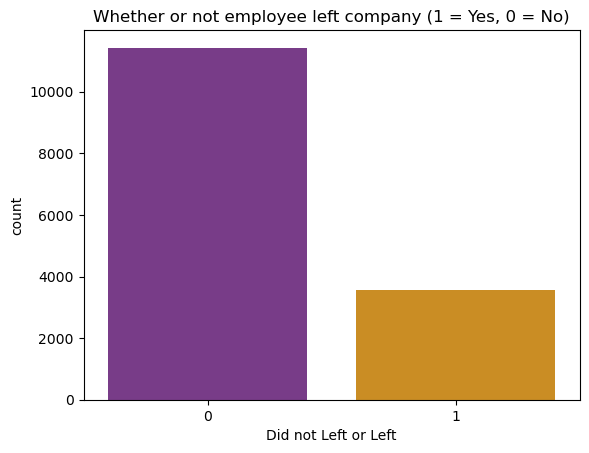

In [11]:
sns.countplot(x='churn',data=data, palette='CMRmap')
plt.title("Whether or not employee left company (1 = Yes, 0 = No)")
plt.xlabel('Did not Left or Left')
plt.show() 

- dataset is unbalanced

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

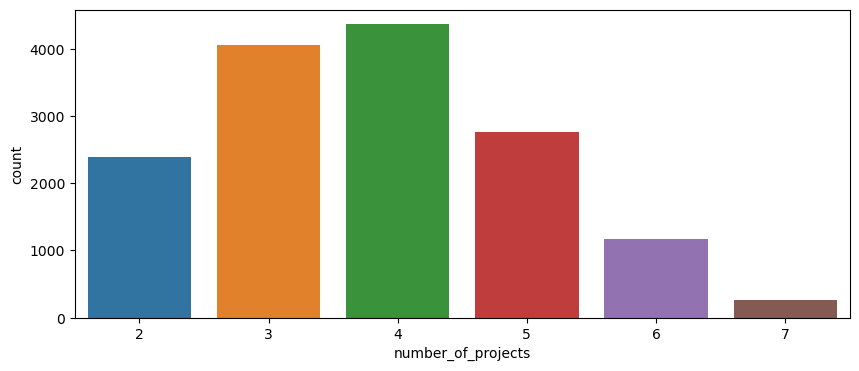

<Figure size 1000x400 with 0 Axes>

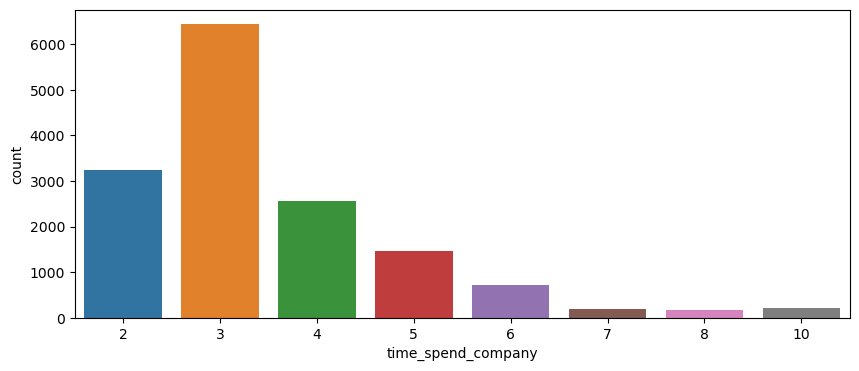

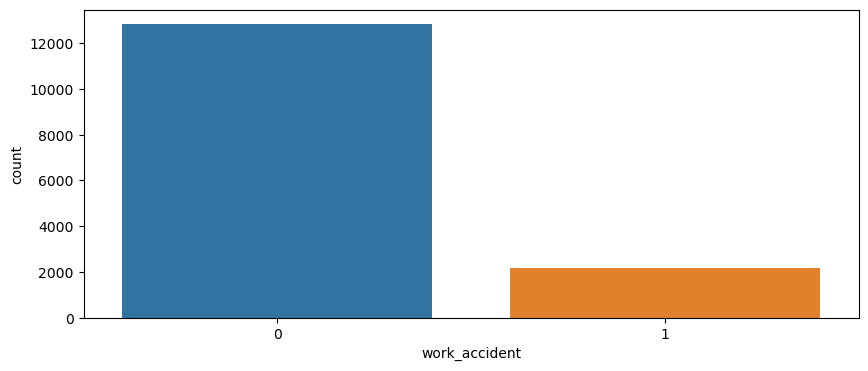

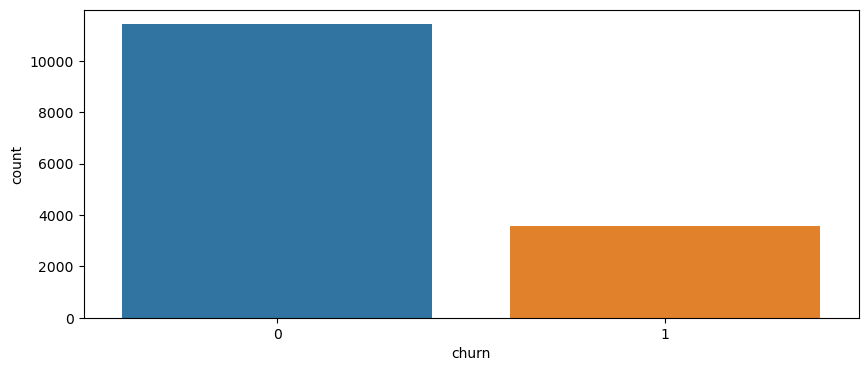

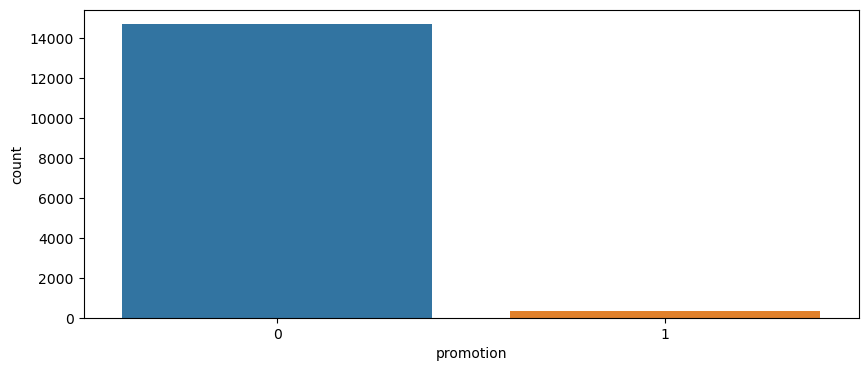

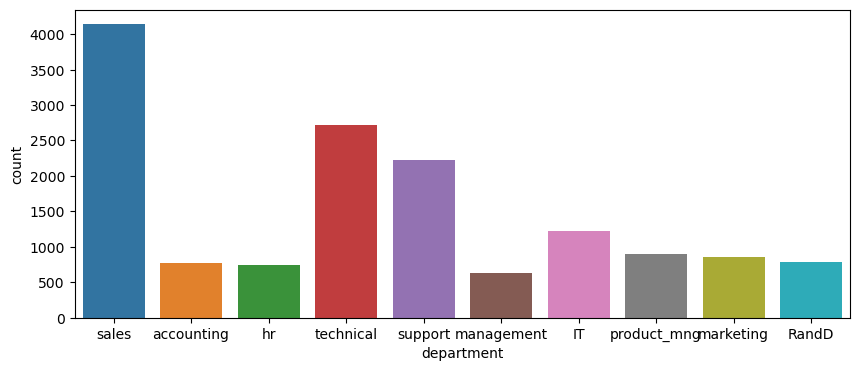

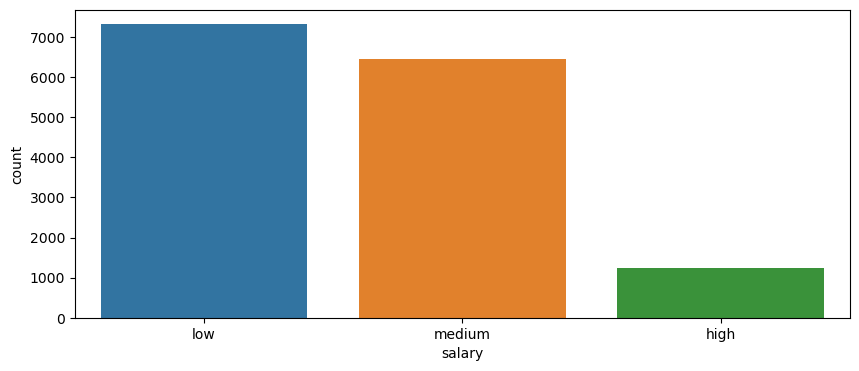

In [12]:
#CountPlot for various columns
for i in data:
    plt.figure(figsize=(10,4))
    if(data[i].nunique()<30):
        sns.countplot(x=data[i])
        plt.show()

In [13]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

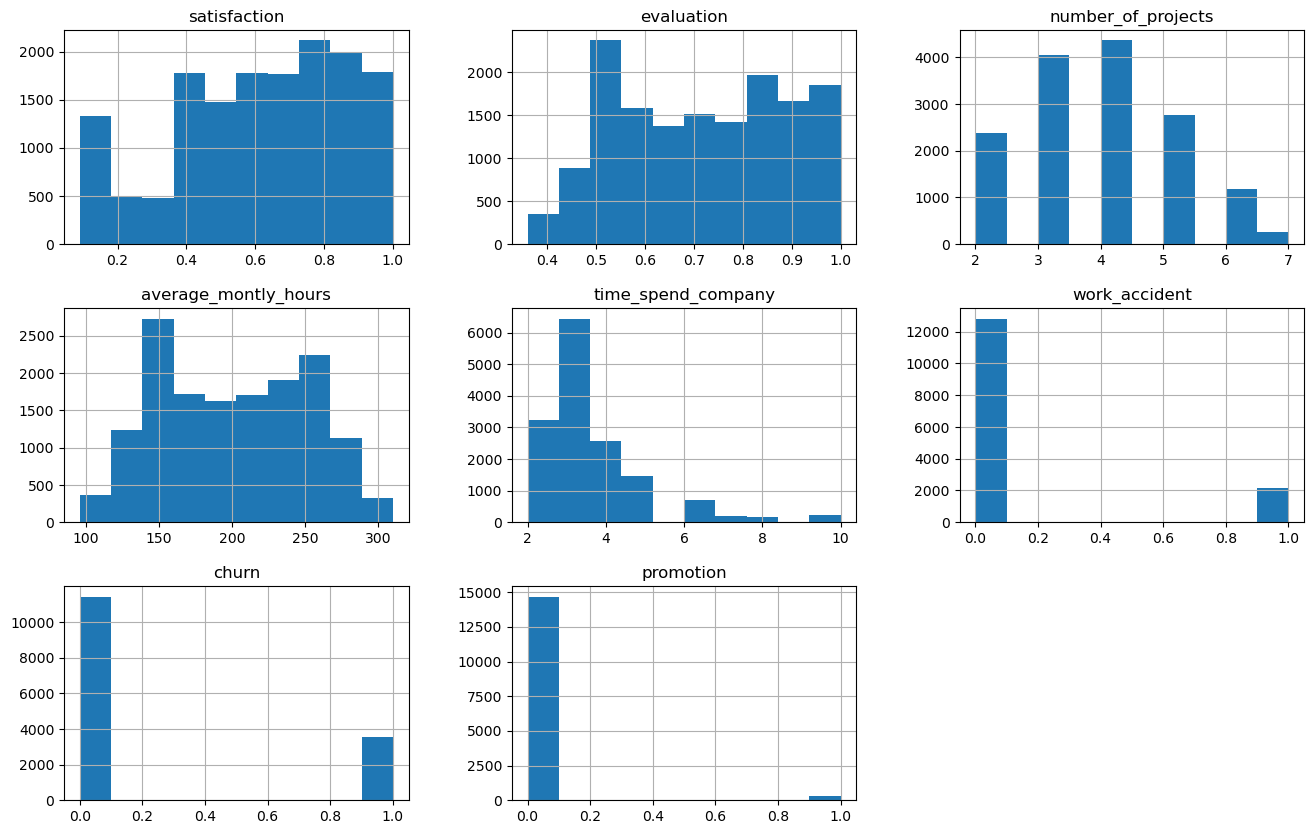

In [14]:
data.hist(figsize=(16,10))
plt.show()

- no features follow normal distribution

## Data Preprocessing

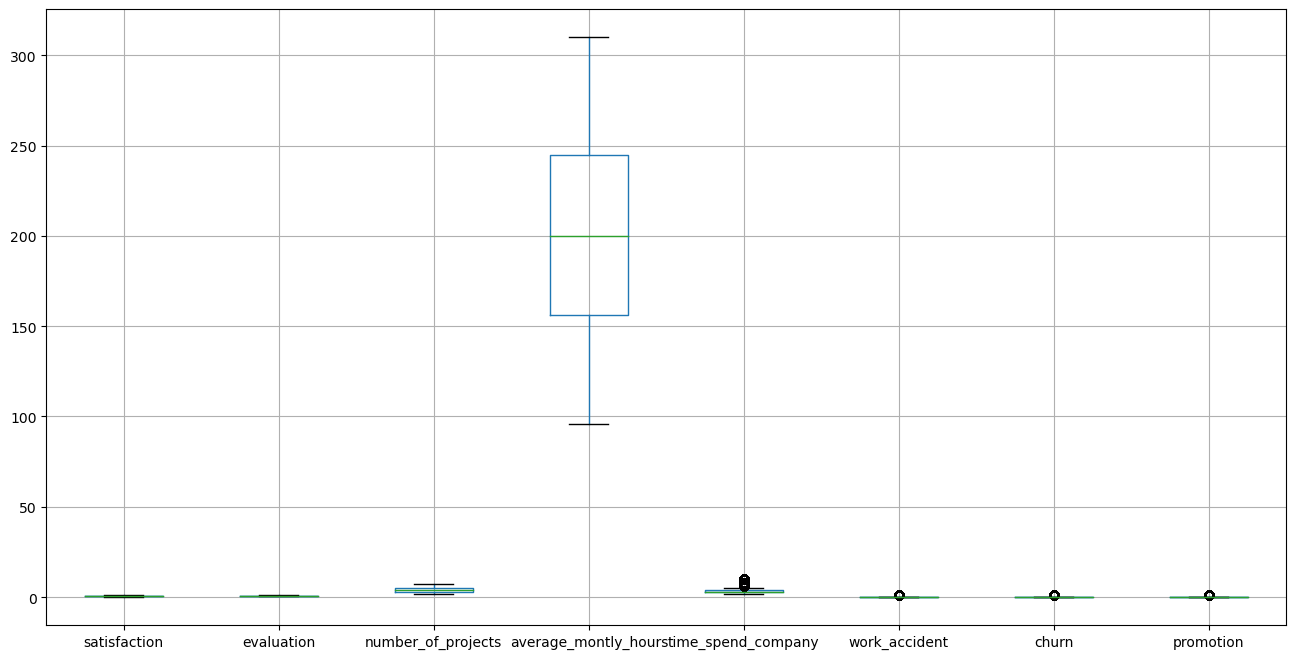

In [15]:
#Using boxplot for Outlier Detection
data.boxplot(figsize=(16,8))
plt.show()

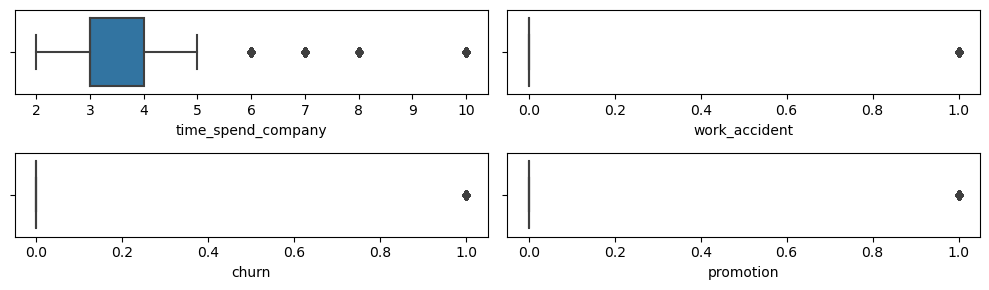

In [16]:
num_col= ['time_spend_company','work_accident','churn','promotion']
plt.figure(figsize=(10, 3))
for i in range(0, len(num_col)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[num_col[i]],orient='v') 
    plt.tight_layout()

In [17]:
data['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

- No major valid outliers present to be removed

In [18]:
#Check if any duplicate rows in dataset
data.duplicated().sum()

3008

In [19]:
data.loc[data.duplicated(),:]

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [20]:
#drop the duplicate values
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(11991, 10)

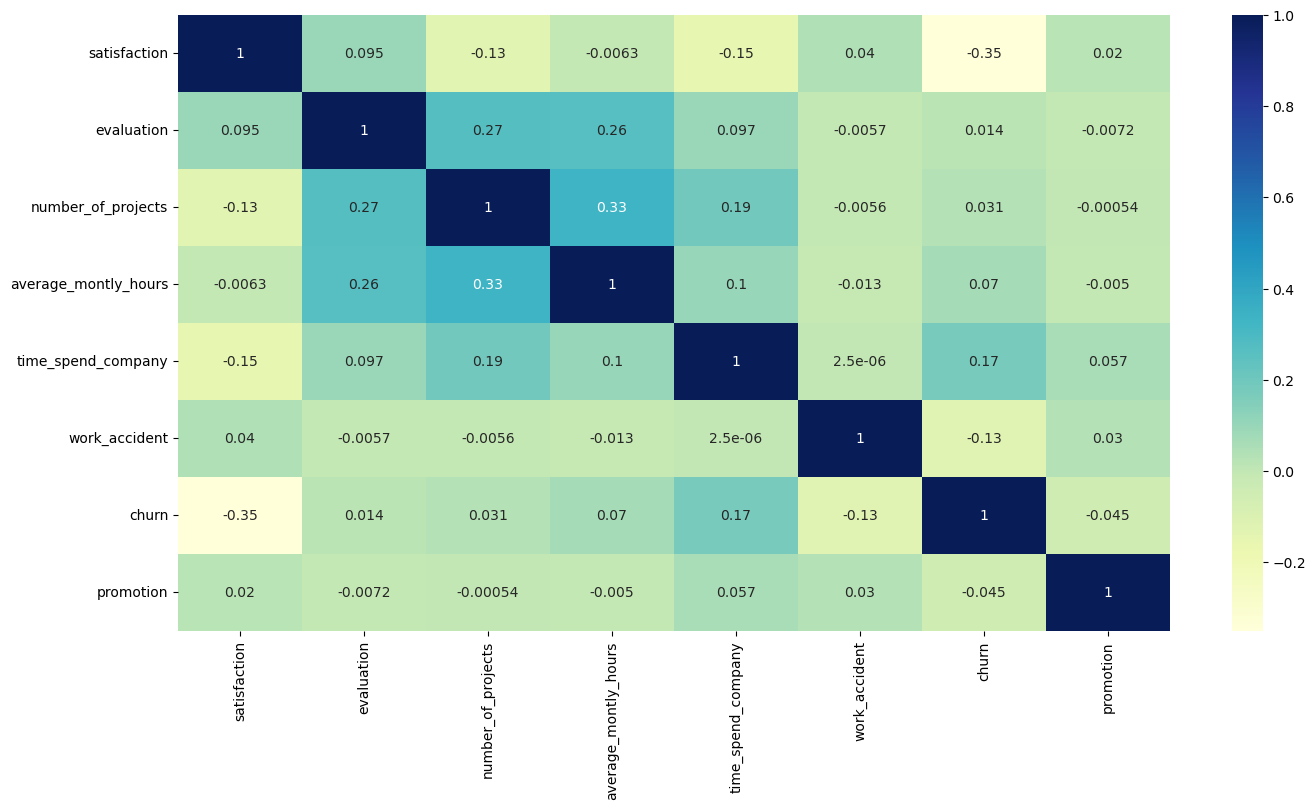

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

- no strong correlations present

## Encoding

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['salary'])

LabelEncoder()

In [24]:
le.classes_ = np.array(["low","medium","high"])
le.classes_ 

array(['low', 'medium', 'high'], dtype='<U6')

In [25]:
data.loc[:,"salary"] = le.transform(data['salary'])

In [26]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [27]:
#One-hot encoding along with dropping first cols to avoid multicollinearity
data1=pd.get_dummies(data,drop_first=True)

In [28]:
data1.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [29]:
data1.shape

(11991, 18)

### Splitting into independent and dependent features

In [30]:
x=data1.drop('churn',axis=1)
y=data1['churn']

In [31]:
y.value_counts(normalize=True)       # if data is unbalanced then use stratify

0    0.833959
1    0.166041
Name: churn, dtype: float64

In [32]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=32, stratify=y)
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8993, 17), (8993,), (2998, 17), (2998,))

In [33]:
y_train.value_counts(normalize=True)

0    0.833982
1    0.166018
Name: churn, dtype: float64

In [34]:
y_test.value_counts(normalize=True)

0    0.833889
1    0.166111
Name: churn, dtype: float64

## Model Building and Evaluation

### 1.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report

print('Accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred))
print('Recall is: ',recall_score(y_test,y_pred))
print('F1 Score is: ',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is:  0.8332221480987325
Precision is:  0.4942528735632184
Recall is:  0.17269076305220885
F1 Score is:  0.255952380952381
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2500
           1       0.49      0.17      0.26       498

    accuracy                           0.83      2998
   macro avg       0.67      0.57      0.58      2998
weighted avg       0.79      0.83      0.80      2998



In [37]:
confusion_matrix(y_test, y_pred)

array([[2412,   88],
       [ 412,   86]], dtype=int64)

### 2.KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
lst_acc=[]
neighbors = np.arange(3,15,2)                    # 2 inside means takes values 5,7,9,.....
for i in neighbors:                      
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc= accuracy_score(y_test, y_pred)
    lst_acc.append(acc)
lst_acc

[0.9472981987991995,
 0.9486324216144096,
 0.9466310873915944,
 0.9472981987991995,
 0.946964643095397,
 0.946964643095397]

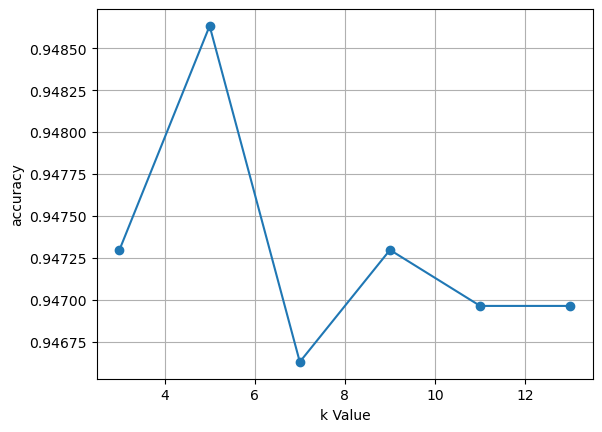

In [39]:
plt.plot(neighbors,lst_acc,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [40]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.9486324216144096


In [41]:
print('Precision is: ',precision_score(y_test,y_pred))
print('Recall is: ',recall_score(y_test,y_pred))
print('F1 Score is: ',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision is:  0.815018315018315
Recall is:  0.893574297188755
F1 Score is:  0.8524904214559387
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2500
           1       0.82      0.89      0.85       498

    accuracy                           0.95      2998
   macro avg       0.90      0.93      0.91      2998
weighted avg       0.95      0.95      0.95      2998



In [42]:
confusion_matrix(y_test, y_pred)

array([[2399,  101],
       [  53,  445]], dtype=int64)

### 3.SVC

In [43]:
from sklearn.svm import SVC
svc = SVC() 
svc_model=svc.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
print('Accuracy is: ', accuracy_score(y_test, y_pred))

Accuracy is:  0.8338892595063375


In [44]:
print('Precision is: ',precision_score(y_test,y_pred))
print('Recall is: ',recall_score(y_test,y_pred))
print('F1 Score is: ',f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision is:  0.0
Recall is:  0.0
F1 Score is:  0.0
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2500
           1       0.00      0.00      0.00       498

    accuracy                           0.83      2998
   macro avg       0.42      0.50      0.45      2998
weighted avg       0.70      0.83      0.76      2998



In [45]:
confusion_matrix(y_test, y_pred)

array([[2500,    0],
       [ 498,    0]], dtype=int64)

## Cross Validation

In [46]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)
from sklearn.model_selection import cross_val_score

In [47]:
#lr
cv_result = cross_val_score(lr_model, x, y, cv=kfold_validator)
cv_result

array([0.        , 0.40783987, 0.9616347 , 0.9557965 , 0.95496247,
       0.95913261, 0.96997498, 0.94912427, 0.9616347 , 0.77397832])

In [48]:
np.mean(cv_result)

0.7894078398665554

In [49]:
#knn
cv_result = cross_val_score(knn_model, x, y, cv=kfold_validator)
cv_result

array([0.79      , 0.9057548 , 0.95329441, 0.94245204, 0.9557965 ,
       0.95496247, 0.94578816, 0.96246872, 0.9557965 , 0.92743953])

In [50]:
np.mean(cv_result)

0.9293753127606339

In [51]:
#svc
cv_result = cross_val_score(svc_model, x, y, cv=kfold_validator)
cv_result

array([0.        , 0.34028357, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [52]:
np.mean(cv_result)

0.8340283569641368

#### By cross Validation the best Classifier model with highest accuracy is KNN Classifier